In [5]:

print("1. Che distribuzioni hanno le diverse features?")
print("2. Che correlazione c'e'  fra le diverse features? [features molto correlate sono ridondanti]")
print("3. Ci sono features costanti, o con una deviazione standard molto molto bassa? [features costanti non portano segnale]")
print("4. Qual e' l'output di 3 diversi feature selection methods?")
print("   Gli output sono coerenti?") 
print("   Quante features mi servono effettivamente per non perdere piu' del 10% di qualita' della classificazione?")

1. Che distribuzioni hanno le diverse features?
2. Che correlazione c'e'  fra le diverse features? [features molto correlate sono ridondanti]
3. Ci sono features costanti, o con una deviazione standard molto molto bassa? [features costanti non portano segnale]
4. Qual e' l'output di 3 diversi feature selection methods?
   Gli output sono coerenti?
   Quante features mi servono effettivamente per non perdere piu' del 10% di qualita' della classificazione?


In [165]:
import pandas as pd
import numpy as np
df_descriptors = pd.read_csv('descriptors.csv', sep=';')
df_descriptors.describe()
df_descriptors.info()

df_descriptors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756 entries, 0 to 2755
Data columns (total 92 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   graph_id               2756 non-null   int64  
 1   edge_source            2756 non-null   int64  
 2   edge_dest              2756 non-null   int64  
 3   is_causal              2756 non-null   int64  
 4   com_cau                2756 non-null   float64
 5   coeff_cause            2756 non-null   object 
 6   coeff_eff              2756 non-null   object 
 7   cau_eff                2756 non-null   float64
 8   eff_cau                2756 non-null   float64
 9   eff_cau_mbeff          2756 non-null   float64
 10  cau_eff_mbcau          2756 non-null   float64
 11  eff_cau_mbcau_plus_q0  2756 non-null   float64
 12  eff_cau_mbcau_plus_q1  2756 non-null   float64
 13  eff_cau_mbcau_plus_q2  2756 non-null   float64
 14  eff_cau_mbcau_plus_q3  2756 non-null   float64
 15  eff_

,graph_id,edge_source,edge_dest,is_causal,com_cau,coeff_cause,coeff_eff,cau_eff,eff_cau,eff_cau_mbeff,...,n_features,n_features/n_samples,kurtosis_ca,kurtosis_ef,skewness_ca,skewness_ef,HOC_1_2,HOC_2_1,HOC_1_3,HOC_3_1
0,0,6,2,1,0.170,-0.017,-0.038,0.170,0.170,0.000,...,12,0.048,-0.946,-0.646,-0.355,-0.399,0.509,-0.350,-1.120,-0.645
1,0,2,6,0,0.170,-0.038,-0.017,0.170,0.170,0.005,...,12,0.048,-0.646,-0.946,-0.399,-0.355,-0.350,0.509,-0.645,-1.120
2,0,11,5,1,0.163,-0.018,-0.008,0.163,0.164,0.000,...,12,0.048,-0.550,-0.653,-0.421,-0.385,0.473,-0.361,-1.044,-0.583
3,0,5,11,0,0.164,-0.008,-0.018,0.164,0.163,0.000,...,12,0.048,-0.653,-0.550,-0.385,-0.421,-0.361,0.473,-0.583,-1.044
4,0,3,2,1,0.194,0.023,0.079,0.194,0.196,0.006,...,12,0.048,-0.926,-0.646,-0.370,-0.399,-0.054,-0.234,0.952,0.725


In [166]:
# data cleaning
df_descriptors = df_descriptors.iloc[:, 3:] # remove first 3 columns

# convert "is_causal" to "is a factor variable
df_descriptors['is_causal'] = df_descriptors['is_causal'].astype('category')

df_descriptors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756 entries, 0 to 2755
Data columns (total 89 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   is_causal              2756 non-null   category
 1   com_cau                2756 non-null   float64 
 2   coeff_cause            2756 non-null   object  
 3   coeff_eff              2756 non-null   object  
 4   cau_eff                2756 non-null   float64 
 5   eff_cau                2756 non-null   float64 
 6   eff_cau_mbeff          2756 non-null   float64 
 7   cau_eff_mbcau          2756 non-null   float64 
 8   eff_cau_mbcau_plus_q0  2756 non-null   float64 
 9   eff_cau_mbcau_plus_q1  2756 non-null   float64 
 10  eff_cau_mbcau_plus_q2  2756 non-null   float64 
 11  eff_cau_mbcau_plus_q3  2756 non-null   float64 
 12  eff_cau_mbcau_plus_q4  2756 non-null   float64 
 13  eff_cau_mbcau_plus_q5  2756 non-null   float64 
 14  eff_cau_mbcau_plus_q6  2756 non-null   f

In [167]:
# convert to numeric only the 'object' type columns (not the first one)
df_descriptors.iloc[:, 1:] = df_descriptors.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
df_descriptors.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756 entries, 0 to 2755
Data columns (total 89 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   is_causal              2756 non-null   category
 1   com_cau                2756 non-null   float64 
 2   coeff_cause            2755 non-null   float64 
 3   coeff_eff              2755 non-null   float64 
 4   cau_eff                2756 non-null   float64 
 5   eff_cau                2756 non-null   float64 
 6   eff_cau_mbeff          2756 non-null   float64 
 7   cau_eff_mbcau          2756 non-null   float64 
 8   eff_cau_mbcau_plus_q0  2756 non-null   float64 
 9   eff_cau_mbcau_plus_q1  2756 non-null   float64 
 10  eff_cau_mbcau_plus_q2  2756 non-null   float64 
 11  eff_cau_mbcau_plus_q3  2756 non-null   float64 
 12  eff_cau_mbcau_plus_q4  2756 non-null   float64 
 13  eff_cau_mbcau_plus_q5  2756 non-null   float64 
 14  eff_cau_mbcau_plus_q6  2756 non-null   f

C:\Users\User\AppData\Local\Temp\ipykernel_10116\4277990934.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_descriptors.iloc[:, 1:] = df_descriptors.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')


In [ ]:
# other cleaning
df_descriptors = df_descriptors.loc[:, (df_descriptors != 0).any(axis=0)]  # remove features with only 0 values
df_descriptors = df_descriptors.dropna(axis=1) # remove features with NaN values
df_descriptors = df_descriptors.loc[:, df_descriptors.apply(pd.Series.nunique) != 1] # remove constant features

In [134]:


df_descriptors.info()

# convert string variables into numerical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in df_descriptors:
    if df_descriptors[column].dtype == 'object':
        df_descriptors[column] = le.fit_transform(df_descriptors[column])

df_descriptors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756 entries, 0 to 2755
Data columns (total 75 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   graph_id               2756 non-null   int64   
 1   edge_source            2756 non-null   int64   
 2   edge_dest              2756 non-null   int64   
 3   is_causal              2756 non-null   category
 4   com_cau                2756 non-null   float64 
 5   coeff_cause            2756 non-null   object  
 6   coeff_eff              2756 non-null   object  
 7   cau_eff                2756 non-null   float64 
 8   eff_cau                2756 non-null   float64 
 9   eff_cau_mbeff          2756 non-null   float64 
 10  cau_eff_mbcau          2756 non-null   float64 
 11  eff_cau_mbcau_plus_q0  2756 non-null   float64 
 12  eff_cau_mbcau_plus_q1  2756 non-null   float64 
 13  eff_cau_mbcau_plus_q2  2756 non-null   float64 
 14  eff_cau_mbcau_plus_q3  2756 non-null   f

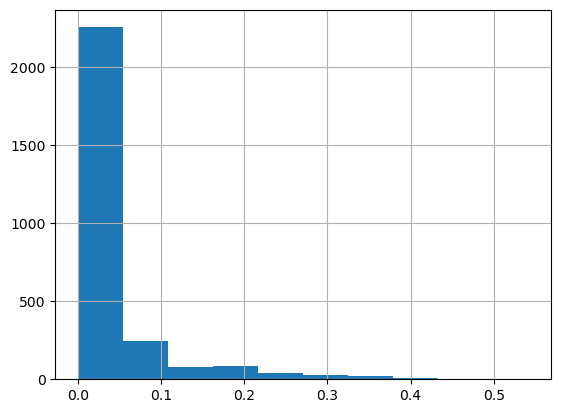

C:\Users\User\AppData\Local\Temp\ipykernel_10116\2892191065.py:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.plot(df_descriptors.mean(), 'o')


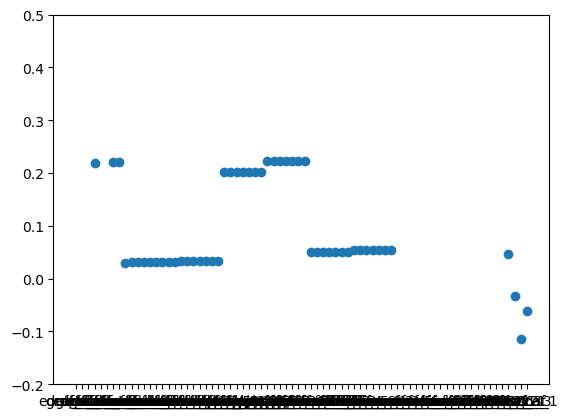

In [135]:
# histogram for a feature
import matplotlib.pyplot as plt
df_descriptors.iloc[:, 20].hist()
plt.show()

plt.plot(df_descriptors.mean(), 'o')
plt.ylim(-0.2, 0.5)
plt.show()

# we could think of some variables that resume the effect of some of these features


In [138]:
# head of the dataset
df_descriptors.head()



,graph_id,edge_source,edge_dest,is_causal,com_cau,coeff_cause,coeff_eff,cau_eff,eff_cau,eff_cau_mbeff,...,mca_mef_eff_q5,mca_mef_eff_q6,kurtosis_ca,kurtosis_ef,skewness_ca,skewness_ef,HOC_1_2,HOC_2_1,HOC_1_3,HOC_3_1
0,0,6,2,1,0.170,17,38,0.170,0.170,0.000,...,0.994,0.994,-0.946,-0.646,-0.355,-0.399,0.509,-0.350,-1.120,-0.645
1,0,2,6,0,0.170,38,17,0.170,0.170,0.005,...,0.999,0.999,-0.646,-0.946,-0.399,-0.355,-0.350,0.509,-0.645,-1.120
2,0,11,5,1,0.163,18,8,0.163,0.164,0.000,...,0.999,0.999,-0.550,-0.653,-0.421,-0.385,0.473,-0.361,-1.044,-0.583
3,0,5,11,0,0.164,8,18,0.164,0.163,0.000,...,0.998,0.998,-0.653,-0.550,-0.385,-0.421,-0.361,0.473,-0.583,-1.044
4,0,3,2,1,0.194,321,377,0.194,0.196,0.006,...,0.994,0.994,-0.926,-0.646,-0.370,-0.399,-0.054,-0.234,0.952,0.725


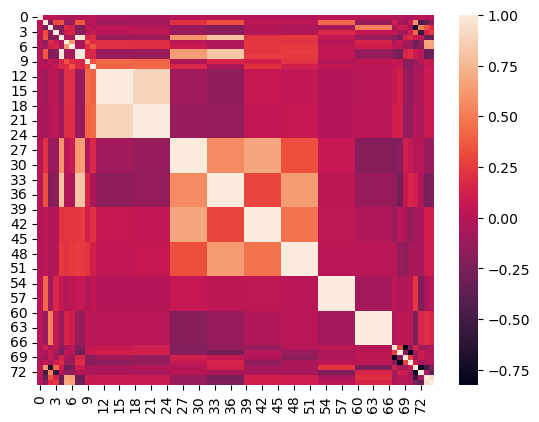

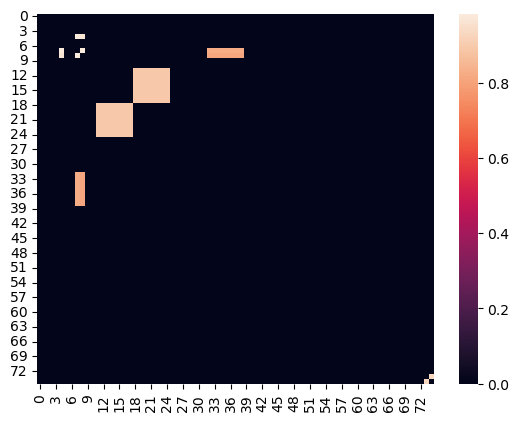

In [104]:
# show me a correlation matrix
df_descriptors.corr().head()
# and a heatmap
import seaborn as sns
sns.heatmap(df_descriptors.corr())
plt.show()

# now impose values under 0.8 and above 0.99 to be 0 and show again the heatmap
df_descriptors_corr = df_descriptors.corr()
df_descriptors_corr[df_descriptors_corr < 0.8] = 0
df_descriptors_corr[df_descriptors_corr > 0.99] = 0
sns.heatmap(df_descriptors_corr)
plt.show()

# we see some high correlations


C:\Users\User\AppData\Local\Temp\ipykernel_10116\1855908678.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756 entries, 0 to 2755
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2756 non-null   float64
 1   1       2756 non-null   float64
 2   2       2756 non-null   float64
 3   3       2756 non-null   float64
 4   4       2756 non-null   float64
 5   5       2756 non-null   float64
 6   6       2756 non-null   float64
 7   9       2756 non-null   float64
 8   10      2756 non-null   float64
 9   11      2756 non-null   float64
 10  25      2756 non-null   float64
 11  39      2756 non-null   float64
 12  46      2756 non-null   float64
 13  53      2756 non-null   float64
 14  60      2756 non-null   float64
 15  67      2756 non-null   float64
 16  68      2756 non-null   float64
 17  71      2756 non-null   float64
 18  72      2756 non-null   float64
 19  73      2756 non-null   float64
dtypes: float64(20)
memory usage: 430.8 KB


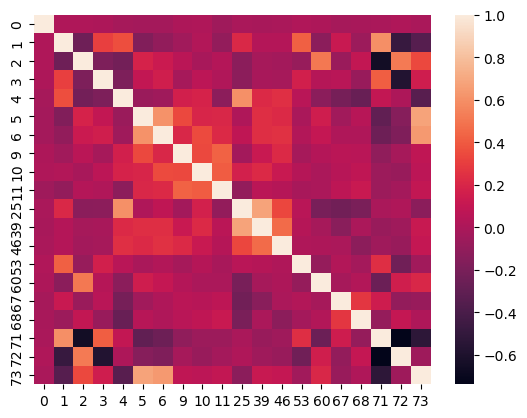

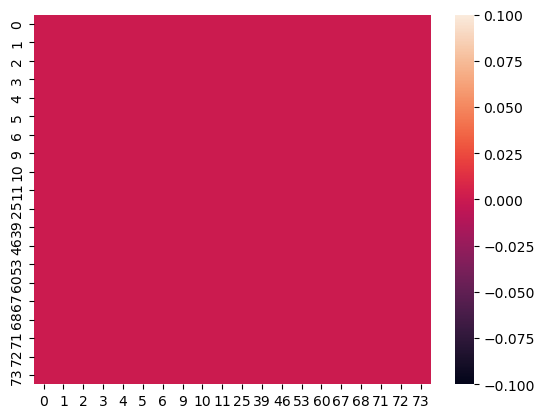

In [105]:
# remove highly correlated features (above 0.8)
corr_matrix = df_descriptors.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
df_descriptors = df_descriptors.drop(to_drop, axis=1)
df_descriptors.info()

# now show me the heatmap again
sns.heatmap(df_descriptors.corr())
plt.show()
# remove values above 0.99 and under 0.8 and show heatmap again
df_descriptors_corr = df_descriptors.corr()
df_descriptors_corr[df_descriptors_corr < 0.8] = 0
df_descriptors_corr[df_descriptors_corr > 0.99] = 0
sns.heatmap(df_descriptors_corr)
plt.show()

In [115]:
# perform stepwise hybrid feature selection with linear regression and use cross validation to find the best number of features and show me the selected features
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

X = df_descriptors.drop('is_causal', axis=1)
y = df_descriptors['is_causal']
lr = LinearRegression()
rfecv = RFECV(estimator=lr, step=1, cv=KFold(n_splits=5), scoring='neg_mean_squared_error')
rfecv.fit(X, y)
print(rfecv.n_features_)
print(rfecv.support_)
print(rfecv.ranking_)
print(X.columns[rfecv.support_])

# describe results
print("Mean squared error: ", mean_squared_error(y, rfecv.predict(X)))
print("Cross validation score: ", cross_val_score(lr, X, y, cv=KFold(n_splits=5), scoring='neg_mean_squared_error').mean())

# now perform the validationset approach to estimate the MSE using the selected features
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
lr.fit(X_train, y_train)
print("MSE on test set: ", mean_squared_error(y_test, lr.predict(X_test)))

# tell me number of features selected
print("Number of features selected: ", rfecv.n_features_)


KeyError: "['is_causal'] not found in axis"